# Advanced data analysis

## Load the data

In [2]:
%run ./0-loading_the_data_define_variables.ipynb

In [3]:
df = df[df.apply(is_valid_state, axis=1)]

# Create an instance of the ColumnTypeConverter
converter = ColumnTypeConverter(df)
# Convert the columns to the specified data types
converter.convert_to_int(COLUMNS_CONVERT_TO_INT)
converter.convert_to_float(COLUMNS_CONVERT_TO_FLOAT)
converter.convert_to_datetime(COLUMNS_CONVERT_TO_DATETIME)


print('Done!')

Done!


# Order the data by the frequently used 'main_category' feature

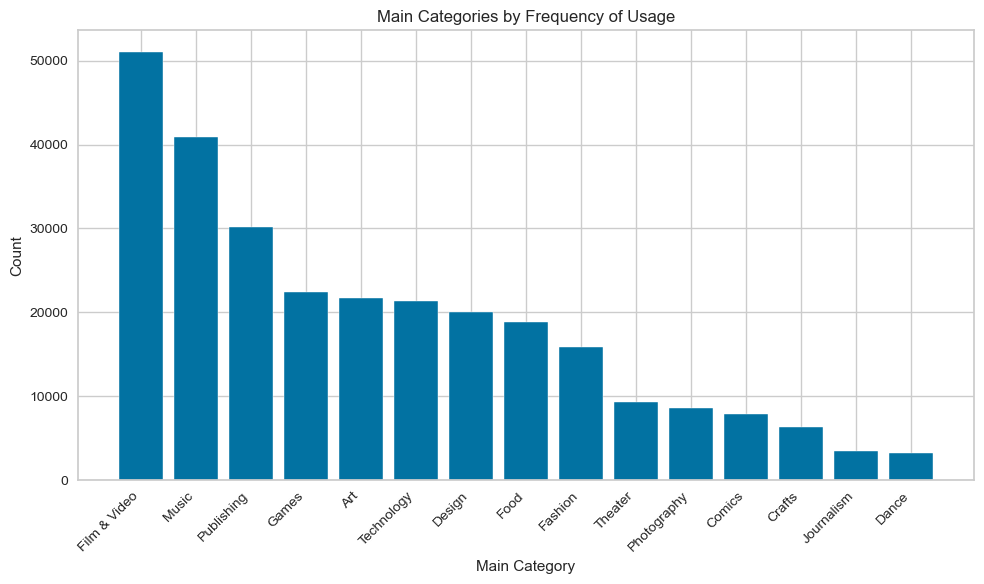

In [53]:
column = 'main_category'

# Group the data by 'main_category' and count the frequency
category_counts = df.groupby('main_category').size().reset_index(name='count')

# Sort the 'main_category' by 'count' in descending order
sorted_main_categories = category_counts.sort_values(by='count', ascending=False)

# Plot the result as a histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_main_categories['main_category'], sorted_main_categories['count'])
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Main Categories by Frequency of Usage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Conslusion

# Divide the data using the state: successful and failed

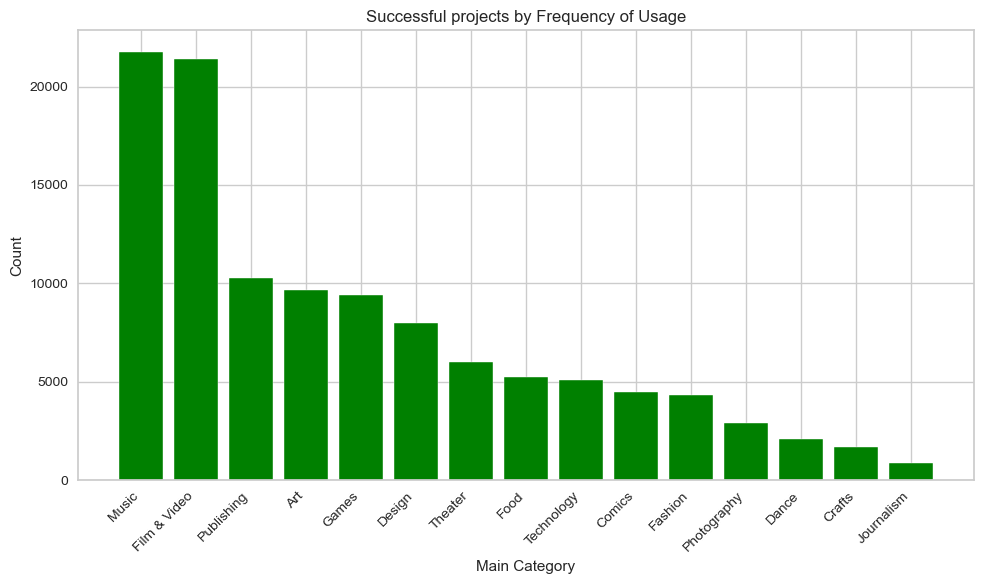

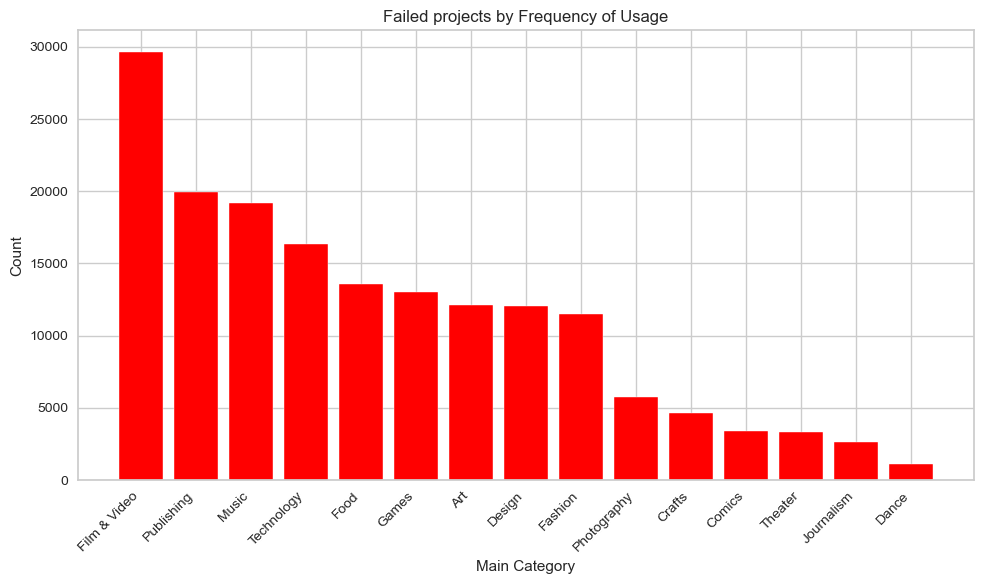

In [158]:
# Filter records or devide it into two datasets: successful and failed projects
successful_projects = df[df['state'] == 'successful']
failed_projects = df[df['state'] == 'failed']

# sort successful_projects by 'main_categories'
successful_main_category_counts = successful_projects[column].value_counts().sort_values(ascending=False)
# sort failed_projects by 'main_categories'
failed_category_counts = failed_projects[column].value_counts().sort_values(ascending=False)

# plot the successful project by main category
plt.figure(figsize=(10, 6))
plt.bar(successful_main_category_counts.index, successful_main_category_counts.values, color='green')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Successful projects by Frequency of Usage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# plot the failed project by main category
plt.figure(figsize=(10, 6))
plt.bar(failed_category_counts.index, failed_category_counts.values, color='red')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Failed projects by Frequency of Usage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Conslusion

# What is the percentage of successful and failed projects per main category

In [90]:


# Create a dataframe with main_category as index and two columns successful and failed representing the number of projects
category_stats = pd.DataFrame({'Successful': successful_main_category_counts, 'Failed': failed_category_counts})

# Calculate the total number of projects per main_category (sum of successful and failed projects)
category_stats['Total'] = category_stats['Successful'] + category_stats['Failed']

# Calculate the percentage of successful projects for each category
category_stats['Success_percentage'] = (category_stats['Successful'] / category_stats['Total']) * 100
category_stats['Failed_percentage'] = (category_stats['Failed'] / category_stats['Total']) * 100

# Sort the DataFrame by success percentage in descending order
category_stats = category_stats.sort_values(by='Success_percentage', ascending=False)

category_stats

,Successful,Failed,Total,Success_percentage,Failed_percentage
Dance,2101,1089,3190,65.862069,34.137931
Theater,5990,3337,9327,64.222151,35.777849
Comics,4499,3406,7905,56.913346,43.086654
Music,21763,19193,40956,53.137513,46.862487
Art,9654,12092,21746,44.394371,55.605629
Film & Video,21404,29653,51057,41.921774,58.078226
Games,9385,13013,22398,41.901063,58.098937
Design,7959,12039,19998,39.798980,60.201020
Publishing,10255,19920,30175,33.985087,66.014913
Photography,2903,5743,8646,33.576220,66.423780


### Conlusion

# Average Funding Goal:

In [91]:
category_stats['average_funding_goal'] = df.groupby('main_category')['goal'].mean()
category_stats#.sort_values(by='average_funding_goal', ascending=False)

,Successful,Failed,Total,Success_percentage,Failed_percentage,average_funding_goal
Dance,2101,1089,3190,65.862069,34.137931,8243.256520
Theater,5990,3337,9327,64.222151,35.777849,22222.441365
Comics,4499,3406,7905,56.913346,43.086654,23810.334256
Music,21763,19193,40956,53.137513,46.862487,14351.509693
Art,9654,12092,21746,44.394371,55.605629,36296.018882
Film & Video,21404,29653,51057,41.921774,58.078226,67972.655482
Games,9385,13013,22398,41.901063,58.098937,44873.536107
Design,7959,12039,19998,39.798980,60.201020,44223.378834
Publishing,10255,19920,30175,33.985087,66.014913,18498.866585
Photography,2903,5743,8646,33.576220,66.423780,11386.274173


### Conlusion

# Average Pledged Amount

In [92]:
category_stats['average_pledged_amount'] = df.groupby('main_category')['pledged'].mean()
category_stats

,Successful,Failed,Total,Success_percentage,Failed_percentage,average_funding_goal,average_pledged_amount
Dance,2101,1089,3190,65.862069,34.137931,8243.256520,3562.334824
Theater,5990,3337,9327,64.222151,35.777849,22222.441365,4111.348771
Comics,4499,3406,7905,56.913346,43.086654,23810.334256,7364.436349
Music,21763,19193,40956,53.137513,46.862487,14351.509693,4120.206910
Art,9654,12092,21746,44.394371,55.605629,36296.018882,3441.927552
Film & Video,21404,29653,51057,41.921774,58.078226,67972.655482,6715.640893
Games,9385,13013,22398,41.901063,58.098937,44873.536107,24415.580747
Design,7959,12039,19998,39.798980,60.201020,44223.378834,27085.728097
Publishing,10255,19920,30175,33.985087,66.014913,18498.866585,3611.623139
Photography,2903,5743,8646,33.576220,66.423780,11386.274173,3553.122384


### Conlusion

# Ratio of the average funding goal to the average amount pledged

In [93]:
category_stats['avg_goal_to_pledged_ratio'] = category_stats.average_funding_goal / category_stats.average_pledged_amount
category_stats

,Successful,Failed,Total,Success_percentage,Failed_percentage,average_funding_goal,average_pledged_amount,avg_goal_to_pledged_ratio
Dance,2101,1089,3190,65.862069,34.137931,8243.256520,3562.334824,2.314004
Theater,5990,3337,9327,64.222151,35.777849,22222.441365,4111.348771,5.405146
Comics,4499,3406,7905,56.913346,43.086654,23810.334256,7364.436349,3.233151
Music,21763,19193,40956,53.137513,46.862487,14351.509693,4120.206910,3.483201
Art,9654,12092,21746,44.394371,55.605629,36296.018882,3441.927552,10.545259
Film & Video,21404,29653,51057,41.921774,58.078226,67972.655482,6715.640893,10.121544
Games,9385,13013,22398,41.901063,58.098937,44873.536107,24415.580747,1.837906
Design,7959,12039,19998,39.798980,60.201020,44223.378834,27085.728097,1.632719
Publishing,10255,19920,30175,33.985087,66.014913,18498.866585,3611.623139,5.122037
Photography,2903,5743,8646,33.576220,66.423780,11386.274173,3553.122384,3.204583


### Conlusion

# Is the funding goal amount has an impact on the success of the projects

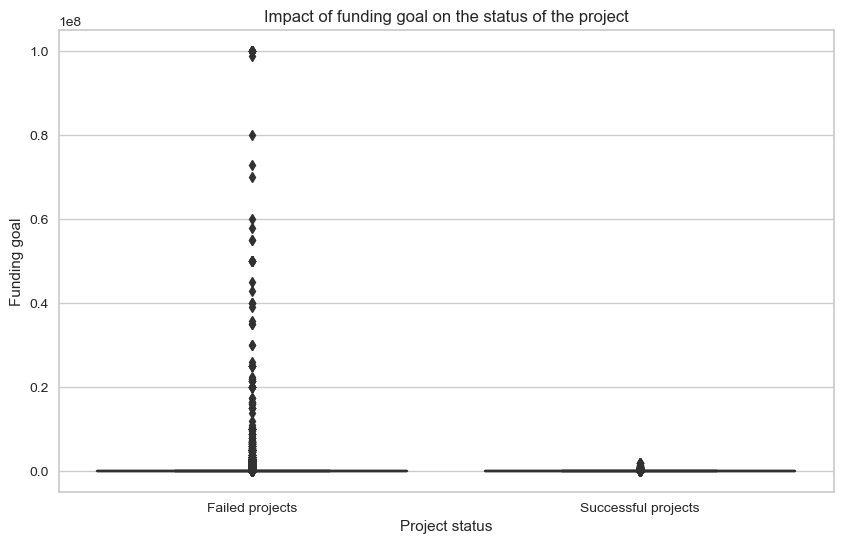

In [122]:
plt.figure(figsize=(10, 6))
categories = ['Failed projects' for i in range(len(failed_projects.goal.values))] + ['Successful projects' for i in range(len(successful_projects.goal.values))]
sns.boxplot(x=categories, y=np.concatenate((failed_projects.goal.values, successful_projects.goal.values)))
plt.xlabel('Project status')
plt.ylabel('Funding goal')
plt.title('Impact of funding goal on the status of the project')
plt.show()

### Conlusion

# Is the number of backers has an important impact on the success 

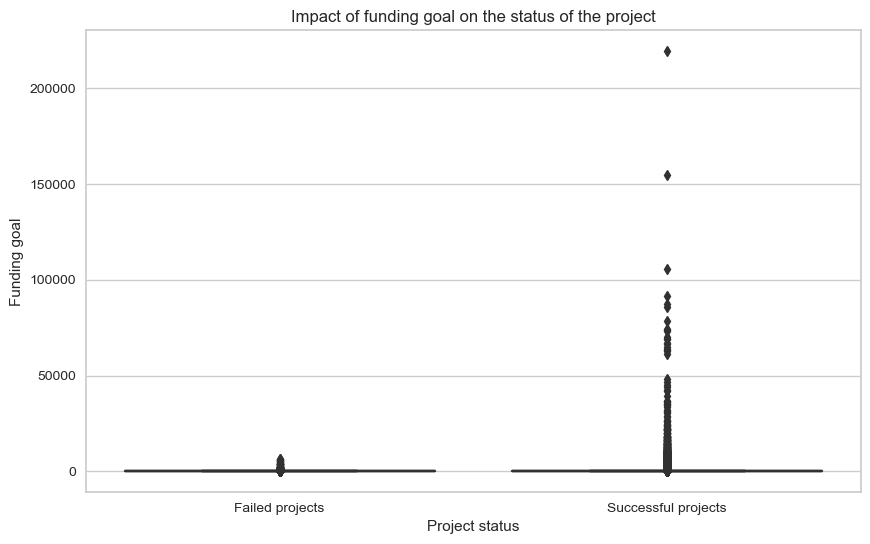

In [123]:
plt.figure(figsize=(10, 6))
categories = ['Failed projects' for i in range(len(failed_projects.backers.values))] + ['Successful projects' for i in range(len(successful_projects.backers.values))]
sns.boxplot(x=categories, y=np.concatenate((failed_projects.backers.values, successful_projects.backers.values)))
plt.xlabel('Project status')
plt.ylabel('Number of backers')
plt.title('Impact of number of backers on the status of the project')
plt.show()

### Conlusion

# Is the project's location has an impact on the success of the project

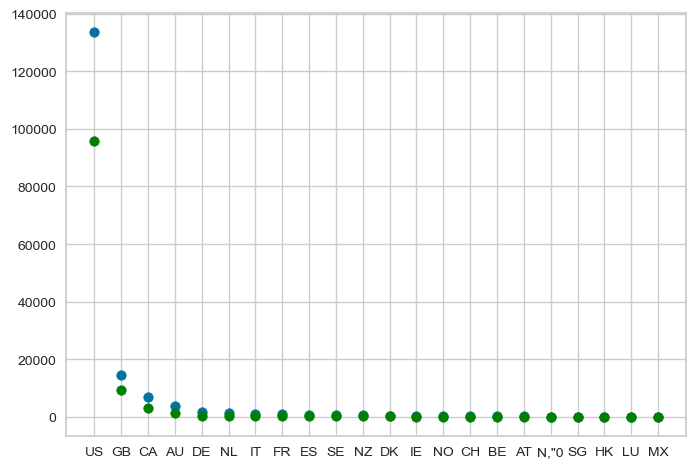

In [135]:
failed_project_country_counts = failed_projects['country'].value_counts()
successful_project_country_counts = successful_projects['country'].value_counts()
plt.scatter(x= failed_project_country_counts.index, y=failed_project_country_counts.values)
plt.scatter(x= successful_project_country_counts.index, y=successful_project_country_counts.values, color='green')

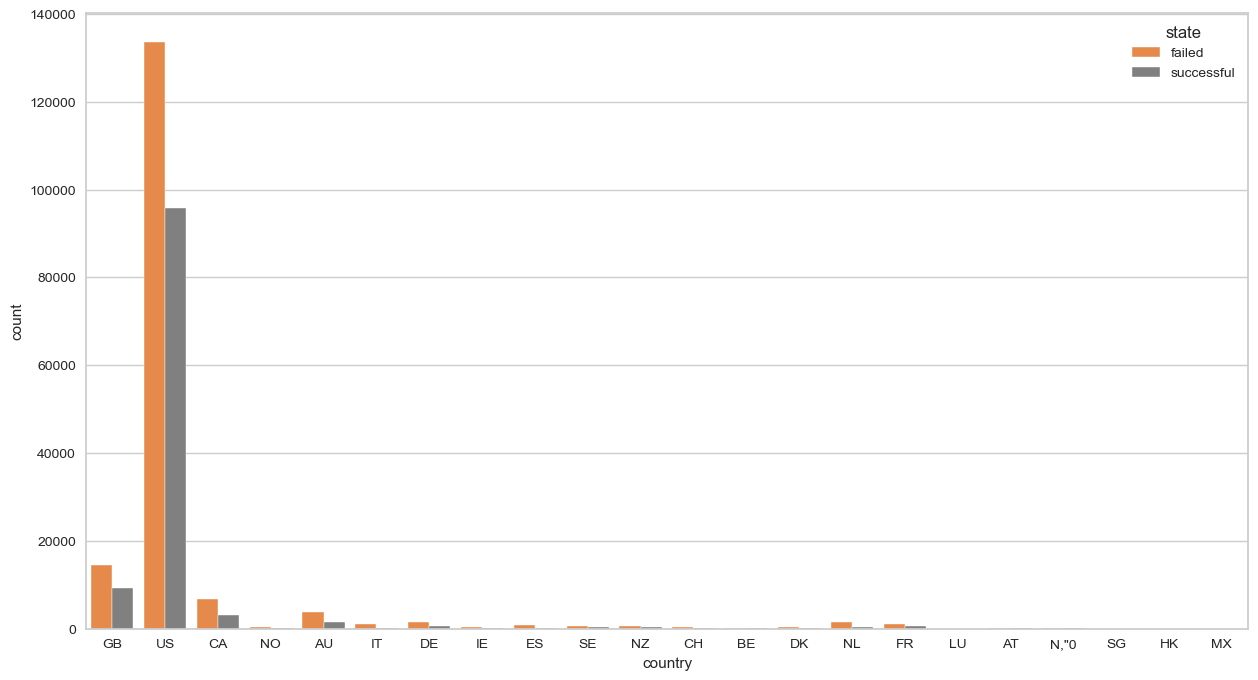

In [157]:
fig, axes = plt.subplots(nrows=1, ncols=1)
sns.countplot(data=df, x='country', hue=target, palette=theme_colors, ax=axes)
fig.set_size_inches(15, 8)

### Conclusion